 # MTH8408 : Méthodes d'optimisation et contrôle optimal
 ## Laboratoire 3: Optimisation sans contraintes et méthodes itératives
Tangi Migot

In [1]:
using LinearAlgebra, NLPModels, Printf

In [2]:
#Test problem:
using ADNLPModels
fH(x) = (x[2]+x[1].^2-11).^2+(x[1]+x[2].^2-7).^2
x0H = [10., 20.]
himmelblau = ADNLPModel(fH, x0H)

problem2 = ADNLPModel(x->-x[1]^2, ones(3))

roz(x) = 100 *  (x[2] - x[1]^2)^2 + (x[1] - 1.0)^2
rosenbrock = ADNLPModel(roz, [-1.2, 1.0])

f(x) = x[1]^2 * (2*x[1] - 3) - 6*x[1]*x[2] * (x[1] - x[2] - 1)
pb_du_cours = ADNLPModel(f, [-1.001, -1.001]) #ou [1.5, .5] ou [.5, .5]

ADNLPModel - Model with automatic differentiation backend ADNLPModels.ADModelBackend{ADNLPModels.ForwardDiffADGradient, ADNLPModels.ForwardDiffADHvprod, ADNLPModels.ForwardDiffADJprod, ADNLPModels.ForwardDiffADJtprod, ADNLPModels.ForwardDiffADJacobian, ADNLPModels.ForwardDiffADHessian, ADNLPModels.ForwardDiffADGHjvprod}(ADNLPModels.ForwardDiffADGradient(ForwardDiff.GradientConfig{ForwardDiff.Tag{typeof(f), Float64}, Float64, 2, Vector{ForwardDiff.Dual{ForwardDiff.Tag{typeof(f), Float64}, Float64, 2}}}((Partials(1.0, 0.0), Partials(0.0, 1.0)), ForwardDiff.Dual{ForwardDiff.Tag{typeof(f), Float64}, Float64, 2}[Dual{ForwardDiff.Tag{typeof(f), Float64}}(0.0,6.9517131813926e-310,6.95171317997604e-310), Dual{ForwardDiff.Tag{typeof(f), Float64}}(0.0,6.9517131813926e-310,6.9517134788225e-310)])), ADNLPModels.ForwardDiffADHvprod(), ADNLPModels.ForwardDiffADJprod(), ADNLPModels.ForwardDiffADJtprod(), ADNLPModels.ForwardDiffADJacobian(0), ADNLPModels.ForwardDiffADHessian(3), ADNLPModels.ForwardDif

## Commentaires sur Julia

Quelques commentaires sur des morceaux de codes que vous avez vu:
- les structures, exemple [GenericExecutionStats](https://github.com/JuliaSmoothOptimizers/SolverCore.jl/blob/0091f437a26a27ac8aa53d5e37647223722f7f7c/src/stats.jl#L60) (constructeur, attribut, type).


In [4]:
] add SolverCore

    Updating registry at `C:\Users\valen\.julia\registries\General.toml`
   Resolving package versions...
   Installed TreeViews ────────────────────── v0.3.0
   Installed GR_jll ───────────────────────── v0.71.5+0
   Installed Calculus ─────────────────────── v0.5.1
   Installed StatsFuns ────────────────────── v1.1.1
   Installed HypergeometricFunctions ──────── v0.3.11
   Installed PDMats ───────────────────────── v0.11.16
   Installed MarchingCubes ────────────────── v0.1.6
   Installed DomainSets ───────────────────── v0.5.15
   Installed PlotUtils ────────────────────── v1.3.4
   Installed LabelledArrays ───────────────── v1.13.0
   Installed Bijections ───────────────────── v0.1.4
   Installed EnumX ────────────────────────── v1.0.4
   Installed RecursiveArrayTools ──────────── v2.36.0
   Installed HTTP ─────────────────────────── v1.7.4
   Installed ZygoteRules ──────────────────── v0.2.2
   Installed Static ───────────────────────── v0.8.3
   Installed GR ─────────────────────

  [a2af1166] + SortingAlgorithms v1.1.0
⌅ [276daf66] + SpecialFunctions v1.8.7
  [aedffcd0] + Static v0.8.3
  [90137ffa] + StaticArrays v1.5.12
  [1e83bf80] + StaticArraysCore v1.4.0
  [82ae8749] + StatsAPI v1.5.0
  [2913bbd2] + StatsBase v0.33.21
  [4c63d2b9] + StatsFuns v1.1.1
  [2efcf032] + SymbolicIndexingInterface v0.2.1
  [d1185830] + SymbolicUtils v1.0.1
  [0c5d862f] + Symbolics v5.0.0
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.10.0
  [62fd8b95] + TensorCore v0.1.1
  [5d786b92] + TerminalLoggers v0.1.6
  [a759f4b9] + TimerOutputs v0.5.22
  [3bb67fe8] + TranscodingStreams v0.9.11
  [a2a6695c] + TreeViews v0.3.0
  [410a4b4d] + Tricks v0.1.6
  [5c2747f8] + URIs v1.4.1
  [3a884ed6] + UnPack v1.0.2
  [1cfade01] + UnicodeFun v0.4.1
  [b8865327] + UnicodePlots v3.3.4
  [1986cc42] + Unitful v1.12.2
  [a7c27f48] + Unityper v0.1.2
  [41fe7b60] + Unzip v0.2.0
  [81def892] + VersionParsing v1.3.0
  [c2297ded] + ZMQ v1.2.2
  [700de1a5] + ZygoteRules v0.2.2
  [6e34b625] + Bzip

  ✓ PDMats
  ✓ Calculus
  ✓ Tricks
  ✓ Combinatorics
  ✓ GroupsCore
  ✓ CommonSolve
  ✓ LambertW
  ✓ ArgCheck
  ✓ CompositeTypes
  ✓ Compat
  ✓ FillArrays
  ✓ EnumX
  ✓ IntervalSets
  ✓ TreeViews
  ✓ AbstractTrees
  ✓ ZygoteRules
  ✓ RuntimeGeneratedFunctions
  ✓ CodecZlib
  ✓ IfElse
  ✓ FunctionWrappersWrappers
  ✓ Bijections
  ✓ ProgressLogging
  ✓ RandomExtensions
  ✓ SymbolicIndexingInterface
  ✓ DensityInterface
  ✓ Unityper
  ✓ BenchmarkProfiles
  ✓ Rmath_jll
  ✓ LinearOperators
  ✓ Setfield
  ✓ ArrayInterfaceCore
  ✓ SodiumSeal
  ✓ LaTeXTabulars
  ✓ GR_jll
  ✓ ChainRulesCore
  ✓ DataStructures
  ✓ LeftChildRightSiblingTrees
  ✓ PGFPlotsX
  ✓ Static
  ✓ MarchingCubes
  ✓ Rmath
  ✓ DomainSets
  ✓ ArrayInterfaceStaticArraysCore
  ✓ HTTP
  ✓ NLPModels
  ✓ ChangesOfVariables
  ✓ SortingAlgorithms
  ✓ SciMLOperators
  ✓ QuadGK
  ✓ TerminalLoggers
  ✓ MultivariatePolynomials
  ✓ ArrayInterface
  ✓ SolverCore
  ✓ SolverTools
  ✓ Parsers
  ✓ RecursiveArrayTools
  ✓ NLPModelsModifiers
  ✓

In [5]:
using SolverCore

In [6]:
? GenericExecutionStats

search: GenericExecutionStats



```
GenericExecutionStats(nlp; ...)
```

A GenericExecutionStats is a struct for storing output information of solvers. It contains the following fields:

  * `status`: Indicates the output of the solver. Use `show_statuses()` for the full list;
  * `solution`: The final approximation returned by the solver (default: an uninitialized vector like `nlp.meta.x0`);
  * `objective`: The objective value at `solution` (default: `Inf`);
  * `dual_feas`: The dual feasibility norm at `solution` (default: `Inf`);
  * `primal_feas`: The primal feasibility norm at `solution` (default: `0.0` if uncontrained, `Inf` otherwise);
  * `multipliers`: The Lagrange multipliers wrt to the constraints (default: an uninitialized vector like `nlp.meta.y0`);
  * `multipliers_L`: The Lagrange multipliers wrt to the lower bounds on the variables (default: an uninitialized vector like `nlp.meta.x0` if there are bounds, or a zero-length vector if not);
  * `multipliers_U`: The Lagrange multipliers wrt to the upper bounds on the variables (default: an uninitialized vector like `nlp.meta.x0` if there are bounds, or a zero-length vector if not);
  * `iter`: The number of iterations computed by the solver (default: `-1`);
  * `elapsed_time`: The elapsed time computed by the solver (default: `Inf`);
  * `solver_specific::Dict{Symbol,Any}`: A solver specific dictionary.

The constructor preallocates storage for the fields above. Special storage may be used for `multipliers_L` and `multipliers_U` by passing them to the constructor. For instance, if a problem has few bound constraints, those multipliers could be held in sparse vectors.

The following fields indicate whether the information above has been updated and is reliable:

  * `solution_reliable`
  * `objective_reliable`
  * `residuals_reliable` (for `dual_feas` and `primal_feas`)
  * `multipliers_reliable` (for `multipliers`)
  * `bounds_multipliers_reliable` (for `multipliers_L` and `multipliers_U`)
  * `iter_reliable`
  * `time_reliable`
  * `solver_specific_reliable`.

Setting fields using one of the methods `set_solution!()`, `set_objective!()`, etc., also marks the field value as reliable.

The `reset!()` method marks all fields as unreliable.

`nlp` is mandatory to set default optional fields.  All other variables can be input as keyword arguments.

Notice that `GenericExecutionStats` does not compute anything, it simply stores.


- Les arguments dans les fonctions. Lire attentivement [la documentation Julia sur les fonctions](https://docs.julialang.org/en/v1/manual/functions/) pour comprendre l'utilisation des `Optional Arguments` et des `Keywords Arguments`. Ce type d'arguments est très utile dans nos applictions où les solveurs dépendent de paramètre dont on peut fixer des valeurs par défaut.

## Exercice 1: Méthode BFGS avec mémoire limitée (L-BFGS)

Le but de cet exercice est d'implémenter la méthode BFGS à mémoire limitée vue en cours en utilisant les `InverseLBFGSOperator` du package `LinearOperators.jl`. Il y a aussi un petit exemple dans la documentation du package [LinearOperators.jl/dev/tutorial/#Limited-memory-BFGS-and-SR1](https://juliasmoothoptimizers.github.io/LinearOperators.jl/dev/tutorial/#Limited-memory-BFGS-and-SR1).

In [7]:
using LinearOperators

In [8]:
? InverseLBFGSOperator

search: InverseLBFGSOperator



```
InverseLBFGSOperator(T, n, [mem=5; scaling=true])
InverseLBFGSOperator(n, [mem=5; scaling=true])
```

Construct a limited-memory BFGS approximation in inverse form. If the type `T` is omitted, then `Float64` is used.


ce qui est important dans ce type de méthode est:
- le paramètre mémoire
- la mise à jour de l'opérateur avec la fonction `push!`
- si on a pas une direction de descente, alors on skip
- recherche linéaire d'Armijo

In [9]:
? LinearOperators.push!

```
push!(collection, items...) -> collection
```

Insert one or more `items` in `collection`. If `collection` is an ordered container, the items are inserted at the end (in the given order).

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
```

If `collection` is ordered, use [`append!`](@ref) to add all the elements of another collection to it. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`. For `AbstractSet` objects, [`union!`](@ref) can be used instead.

See [`sizehint!`](@ref) for notes about the performance model.

See also [`pushfirst!`](@ref).

---

```
push!(op, s, y)
push!(op, s, y, Bs)
push!(op, s, y, α, g)
push!(op, s, y, α, g, Bs)
```

Push a new {s,y} pair into a L-BFGS operator. The second calling sequence is used for forward updating damping, using the preallocated vector `Bs`. If the operator is damped, the first call will create `Bs` and call the second call. The third and fourth calling sequences are used in inverse LBFGS updating in conjunction with damping, where α is the most recent steplength and g the gradient used when solving `d=-Hg`.

---

```
push!(op, s, y)
```

Push a new {s,y} pair into a L-SR1 operator.


In [10]:
function armijo(xk, dk, fk, gk, slope, nlp :: AbstractNLPModel; τ1 = 1.0e-4, t_update = 1.5)
  t = 1.0
  fk_new = obj(nlp, xk + dk) # t = 1.0
  while fk_new > fk + τ1 * t * slope
    t /= t_update
    fk_new = obj(nlp, xk + t * dk)
  end
  return t, fk_new
end

armijo (generic function with 1 method)

In [33]:
function limited_bfgs(nlp      :: AbstractNLPModel;
                      x        :: AbstractVector = nlp.meta.x0,
                      atol     :: Real = √eps(eltype(x)), 
                      rtol     :: Real = √eps(eltype(x)),
                      max_eval :: Int = -1,
                      max_time :: Float64 = 30.0,
                      f_min    :: Float64 = -1.0e16,
                      verbose  :: Bool = true,
                      mem      :: Int = 5)
  start_time = time()
  elapsed_time = 0.0

  T = eltype(x)
  n = nlp.meta.nvar

  xt = zeros(T, n)
  ∇ft = zeros(T, n)

  f = obj(nlp, x)
  ∇f = grad(nlp, x)
#################################################
  H = InverseLBFGSOperator(n, mem; scaling=true) #initialisation de H
#################################################

  ∇fNorm = norm(∇f) #nrm2(n, ∇f)
  ϵ = atol + rtol * ∇fNorm
  iter = 0

  @info log_header([:iter, :f, :dual, :slope, :bk], [Int, T, T, T, T],
                   hdr_override=Dict(:f=>"f(x)", :dual=>"‖∇f‖", :slope=>"∇fᵀd"))

  optimal = ∇fNorm ≤ ϵ
  unbdd = f ≤ f_min
  tired = neval_obj(nlp) > max_eval ≥ 0 || elapsed_time > max_time
  stalled = false
  status = :unknown

  while !(optimal || tired || stalled || unbdd)

#################################################
    d = -H*∇f #calcul de la distance d à parcourir à cette itération
#################################################
    slope = dot(d, ∇f)
    if slope ≥ 0
      @error "not a descent direction" slope
      status = :not_desc
      stalled = true
      continue
    end

    # Perform improved Armijo linesearch.
    t, ft = armijo(x, d, f, ∇f, slope, nlp)
        
    @info log_row(Any[iter, f, ∇fNorm, slope, t])

    # Update L-BFGS approximation.
    xt = x + t * d
    ∇ft = grad(nlp, xt) # grad!(nlp, xt, ∇ft)
#################################################
    #calcul des nouveaux y et s
    s = xt - x
    y = ∇ft - ∇f
    #update de H
    push!(H, s, y)
#################################################

    # Move on.
    x = xt
    f = ft
    ∇f = ∇ft

    ∇fNorm = norm(∇f) #nrm2(n, ∇f)
    iter = iter + 1

    optimal = ∇fNorm ≤ ϵ
    unbdd = f ≤ f_min
    elapsed_time = time() - start_time
    tired = neval_obj(nlp) > max_eval ≥ 0 || elapsed_time > max_time
  end
  @info log_row(Any[iter, f, ∇fNorm])

  if optimal
    status = :first_order
  elseif tired
    if neval_obj(nlp) > max_eval ≥ 0
      status = :max_eval
    elseif elapsed_time > max_time
      status = :max_time
    end
  elseif unbdd
        status = :unbounded
  end

  return GenericExecutionStats(
        nlp,
        status=status,
        solution=x,
        objective=f,
        dual_feas=∇fNorm,
        iter=iter,
        elapsed_time=elapsed_time,
    )
end

limited_bfgs (generic function with 1 method)

In [34]:
#Unit/Validation Tests
# Réaliser un test unitaire

#paramètres du test unitaire
f(x) = (1-x[1])^2 + (1-x[2])^2
x0 = zeros(2)

nlp = ADNLPModel(f, x0)
limited_bfgs(nlp)

[ Info:   iter      f(x)      ‖∇f‖      ∇fᵀd        bk  
[ Info:      0   2.0e+00   2.8e+00  -8.0e+00   6.7e-01
[ Info:      1   2.2e-01   9.4e-01  -4.4e-01   1.0e+00
[ Info:      2   0.0e+00   0.0e+00


"Execution stats: first-order stationary"

In [41]:
stats = limited_bfgs(pb_du_cours, x = [1.5, .5])
stats.solution
grad(pb_du_cours, stats.solution)

[ Info:   iter      f(x)      ‖∇f‖      ∇fᵀd        bk  
[ Info:      0   5.0e-01   1.4e+00  -2.0e+00   6.7e-01
[ Info:      1   5.6e-02   4.7e-01  -1.1e-01   1.0e+00
[ Info:      2   0.0e+00   0.0e+00


2-element Vector{Float64}:
 -0.0
 -0.0

In [42]:
using Test

# Demander le test secret pour lbfgs
@testset begin
    #Unit/Validation Tests
    using Logging, Test
    stats = with_logger(NullLogger()) do 
        limited_bfgs(himmelblau) 
    end
    @test stats.status == :first_order
    @test stats.solution ≈ [3.584428266659278, -1.8481265666485827] atol = 1e-6
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(problem2) 
    end
    @test stats.status == :unbounded
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(rosenbrock) 
    end
    @test stats.solution ≈ [1., 1.] atol = 1e-6
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(pb_du_cours, x = [-1.001, -1.001]) 
    end
    @test stats.status == :first_order # unbounded
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(pb_du_cours, x = [1.5, .5]) 
    end
    @test stats.status == :first_order
    @test stats.solution ≈ [1., 1.] atol = 1e-6 #initialement [1., 0.]
    @test norm(grad(pb_du_cours, stats.solution)) ≈ 0 atol = 1e-6
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(pb_du_cours, x = [.5, .5]) 
    end
    @test stats.status == :first_order
    @test stats.solution ≈ [1., 1.] atol = 1e-6 #initialement [1., 0.]
    @test norm(grad(pb_du_cours, stats.solution)) ≈ 0 atol = 1e-6
    @show (stats.status, stats.solution)
end


(stats.status, stats.solution) = (:first_order, [3.584428266659278, -1.8481265666485829])
(stats.status, stats.solution) = (:unbounded, [1.29140163e8, 1.0, 1.0])
(stats.status, stats.solution) = (:first_order, [0.9999999887950609, 0.9999999782159007])
(stats.status, stats.solution) = (:first_order, [1.0, 1.0])
(stats.status, stats.solution) = (:first_order, [1.0, 1.0])
(stats.status, stats.solution) = (:first_order, [1.0, 1.0])
Test Summary: | Pass  Total  Time
test set      |   11     11  0.1s


Test.DefaultTestSet("test set", Any[], 11, false, false, true, 1.675697637623e9, 1.675697637724e9)

### Bonus:

- Compare l'implémentation de `limited_bfgs` avec la fonction `lbfgs` qui est disponible dans `JSOSolvers.jl`.
- On veut pouvoir tester "facilement" plusieurs valeurs de $\tau$ et du paramètre de mise à jour dans `armijo` sur les problèmes tests. Comment modifier le code pour que ça soit possible?

On peut mesurer deux executions de fonctions Julia grâce aux fonctions de `BenchmarkTools.jl`:

In [43]:
using BenchmarkTools

In [44]:
? @time

```
@time expr
@time "description" expr
```

A macro to execute an expression, printing the time it took to execute, the number of allocations, and the total number of bytes its execution caused to be allocated, before returning the value of the expression. Any time spent garbage collecting (gc), compiling new code, or recompiling invalidated code is shown as a percentage.

Optionally provide a description string to print before the time report.

In some cases the system will look inside the `@time` expression and compile some of the called code before execution of the top-level expression begins. When that happens, some compilation time will not be counted. To include this time you can run `@time @eval ...`.

See also [`@showtime`](@ref), [`@timev`](@ref), [`@timed`](@ref), [`@elapsed`](@ref), and [`@allocated`](@ref).

!!! note
    For more serious benchmarking, consider the `@btime` macro from the BenchmarkTools.jl package which among other things evaluates the function multiple times in order to reduce noise.


!!! compat "Julia 1.8"
    The option to add a description was introduced in Julia 1.8.

    Recompilation time being shown separately from compilation time was introduced in Julia 1.8


```julia-repl
julia> x = rand(10,10);

julia> @time x * x;
  0.606588 seconds (2.19 M allocations: 116.555 MiB, 3.75% gc time, 99.94% compilation time)

julia> @time x * x;
  0.000009 seconds (1 allocation: 896 bytes)

julia> @time begin
           sleep(0.3)
           1+1
       end
  0.301395 seconds (8 allocations: 336 bytes)
2

julia> @time "A one second sleep" sleep(1)
A one second sleep: 1.005750 seconds (5 allocations: 144 bytes)

julia> for loop in 1:3
            @time loop sleep(1)
        end
1: 1.006760 seconds (5 allocations: 144 bytes)
2: 1.001263 seconds (5 allocations: 144 bytes)
3: 1.003676 seconds (5 allocations: 144 bytes)
```


In [45]:
using JSOSolvers

In [47]:
@time limited_bfgs(nlp)
@time lbfgs(nlp)

  0.001172 seconds (528 allocations: 29.484 KiB)
  0.000090 seconds (130 allocations: 8.133 KiB)


[ Info:   iter      f(x)      ‖∇f‖      ∇fᵀd        bk  
[ Info:      0   2.0e+00   2.8e+00  -8.0e+00   6.7e-01
[ Info:      1   2.2e-01   9.4e-01  -4.4e-01   1.0e+00
[ Info:      2   0.0e+00   0.0e+00


"Execution stats: first-order stationary"

## Exercice 2: NewtonCG

Le but de cet exercice est d'adapter les méthodes de Newton de façon à résoudre le système linéaire avec une méthode itérative de type gradient conjugué comme suit ($B_k$ représente la matrice hessienne):

<img src="LineSearchNewtonCG.png" width=600 height=600 />

In [49]:
function cg_optim(H, ∇f)
    #setup the tolerance:
    n∇f = norm(∇f)
#####################################
    ϵk = min(0.5, sqrt(n∇f))*n∇f
####################################
    n = length(∇f)
    z = zeros(n)
    r = ∇f
    d = -r
    
    j = 0
    while norm(r) ≥ ϵk && j < 3 * n
###############################################
        den = dot(d, H * d)
        if  den ≤ 0
            if j==0
                return -∇f
            else
                return z
            end
        end
##############################################
        α = dot(r,r)/den
##############################################        
        z += α * d
        nrr2 = dot(r, r)
        r += α * H * d
##############################################
        β  = dot(r,r)/nrr2
##############################################
        d  = -r + β * d
        j += 1
    end
    return z
end

cg_optim (generic function with 1 method)

Ce qui est important ici est qu'on a pas besoin de stocker/évaluer la matrice hessienne entière mais simplement le produit entre la hessienne et un vecteur. Pour un `NLPModels` on utilise:

In [50]:
? NLPModels.hprod

```
Hv = hprod(nlp, x, v; obj_weight=1.0)
```

Evaluate the product of the objective Hessian at `x` with the vector `v`, with objective function scaled by `obj_weight`, where the objective Hessian is

$$
σ ∇²f(x),
$$

with `σ = obj_weight` .

---

```
Hv = hprod(nlp, x, y, v; obj_weight=1.0)
```

Evaluate the product of the Lagrangian Hessian at `(x,y)` with the vector `v`, with objective function scaled by `obj_weight`, where the Lagrangian Hessian is

$$
∇²L(x,y) = σ ∇²f(x) + \sum_i yᵢ ∇²cᵢ(x),
$$

with `σ = obj_weight` .


In [51]:
? NLPModels.hess_op

```
H = hess_op(nlp, x; obj_weight=1.0)
```

Return the objective Hessian at `x` with objective function scaled by `obj_weight` as a linear operator. The resulting object may be used as if it were a matrix, e.g., `H * v`. The linear operator H represents

$$
σ ∇²f(x),
$$

with `σ = obj_weight` .

---

```
H = hess_op(nlp, x, y; obj_weight=1.0)
```

Return the Lagrangian Hessian at `(x,y)` with objective function scaled by `obj_weight` as a linear operator. The resulting object may be used as if it were a matrix, e.g., `H * v`. The linear operator H represents

$$
∇²L(x,y) = σ ∇²f(x) + \sum_i yᵢ ∇²cᵢ(x),
$$

with `σ = obj_weight` .


In [52]:
function armijo_Newton_cg(nlp      :: AbstractNLPModel;
                          x        :: AbstractVector = nlp.meta.x0,
                          atol     :: Real = √eps(eltype(x)), 
                          rtol     :: Real = √eps(eltype(x)),
                          max_eval :: Int = -1,
                          max_time :: Float64 = 30.0,
                          f_min    :: Float64 = -1.0e16)
  start_time = time()
  elapsed_time = 0.0

  T = eltype(x)
  n = nlp.meta.nvar

  f = obj(nlp, x)
  ∇f = grad(nlp, x)
#################################################
  H = hess_op(nlp, x)
#################################################

  ∇fNorm = norm(∇f) #nrm2(n, ∇f)
  ϵ = atol + rtol * ∇fNorm
  iter = 0

  @info log_header([:iter, :f, :dual, :slope, :bk], [Int, T, T, T, T],
                   hdr_override=Dict(:f=>"f(x)", :dual=>"‖∇f‖", :slope=>"∇fᵀd"))

  optimal = ∇fNorm ≤ ϵ
  unbdd = f ≤ f_min
  tired = neval_obj(nlp) > max_eval ≥ 0 || elapsed_time > max_time
  stalled = false
  status = :unknown

  while !(optimal || tired || stalled || unbdd)
        
    d = cg_optim(H, ∇f)
        
    slope = dot(d, ∇f)
    if slope ≥ 0
      @error "not a descent direction" slope
      status = :not_desc
      stalled = true
      continue
    end

    # Perform improved Armijo linesearch.
    t, f = armijo(x, d, f, ∇f, slope, nlp)
        
    @info log_row(Any[iter, f, ∇fNorm, slope, t])

    # Update L-BFGS approximation.
    x += t * d
    ∇f = grad(nlp, x)
#################################################
    H = hess_op(nlp, x)
#################################################

    ∇fNorm = norm(∇f) #nrm2(n, ∇f)
    iter = iter + 1

    optimal = ∇fNorm ≤ ϵ
    unbdd = f ≤ f_min
    elapsed_time = time() - start_time
    tired = neval_obj(nlp) > max_eval ≥ 0 || elapsed_time > max_time
  end
  @info log_row(Any[iter, f, ∇fNorm])

  if optimal
    status = :first_order
  elseif tired
    if neval_obj(nlp) > max_eval ≥ 0
      status = :max_eval
    elseif elapsed_time > max_time
      status = :max_time
    end
  elseif unbdd
        status = :unbounded
  end

  return GenericExecutionStats(nlp, status = status, solution=x, objective=f, dual_feas=∇fNorm,
                               iter=iter, elapsed_time=elapsed_time)
end

armijo_Newton_cg (generic function with 1 method)

In [60]:
#Unit/Validation Tests
# Réaliser un test unitaire

#paramètres du test unitaire
f(x) = (1-x[1])^2 + (1-x[2])^2
x0 = zeros(2)

nlp = ADNLPModel(f, x0)
stats = armijo_Newton_cg(nlp)
stats.solution
@test stats.solution ≈ [1., 1.] atol = 1e-6

[ Info:   iter      f(x)      ‖∇f‖      ∇fᵀd        bk  
[ Info:      0   0.0e+00   2.8e+00  -4.0e+00   1.0e+00
[ Info:      1   0.0e+00   0.0e+00


Test Passed

In [62]:
# Demander le test secret pour newton-cg
using Test

# Demander le test secret pour newton-cg
@testset begin
    #Unit/Validation Tests
    using Logging, Test
    stats = with_logger(NullLogger()) do 
        armijo_Newton_cg(himmelblau) 
    end
    @test stats.status == :first_order
    @test stats.dual_feas ≤ 1e-6 + 1e-6 * norm(grad(himmelblau, himmelblau.meta.x0))
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        armijo_Newton_cg(problem2) 
    end
    @test stats.status == :unbounded
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        armijo_Newton_cg(rosenbrock) 
    end
    @test stats.solution ≈ [1., 1.] atol = 1e-5
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        armijo_Newton_cg(pb_du_cours, x = [-1.001, -1.001]) 
    end
    @test stats.status == :first_order # unbounded
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(pb_du_cours, x = [1.5, .5]) 
    end
    @test stats.status == :first_order
    @test stats.solution ≈ [1., 1.] atol = 1e-6 #initialement [1., 0.]
    @test norm(grad(pb_du_cours, stats.solution)) ≈ 0 atol = 1e-6
    @show (stats.status, stats.solution)
    stats = with_logger(NullLogger()) do 
        limited_bfgs(pb_du_cours, x = [.5, .5]) 
    end
    @test stats.status == :first_order
    @test stats.solution ≈ [1., 1.] atol = 1e-6 #initialement [1., 0.]
    @test norm(grad(pb_du_cours, stats.solution)) ≈ 0 atol = 1e-6
    @show (stats.status, stats.solution)
end

(stats.status, stats.solution) = (:first_order, [2.9999993048920612, 2.000003199723837])
(stats.status, stats.solution) = (:unbounded, [1.29140163e8, 1.0, 1.0])
(stats.status, stats.solution) = (:first_order, [0.999999476502548, 0.9999989509130072])
(stats.status, stats.solution) = (:first_order, [1.0, 1.0])
(stats.status, stats.solution) = (:first_order, [1.0, 1.0])
(stats.status, stats.solution) = (:first_order, [1.0, 1.0])
Test Summary: | Pass  Total  Time
test set      |   11     11  0.1s


Test.DefaultTestSet("test set", Any[], 11, false, false, true, 1.675699106786e9, 1.675699106866e9)

## Comment préparer un benchmark

On veut maintenant pouvoir réaliser un benchmark de plusieurs solveurs. Pour comparer les algorithmes, il nous faut une collection de problèmes tests et on va utiliser `OptimizationProblems.jl`.

In [63]:
using OptimizationProblems

[ Info: Precompiling OptimizationProblems [5049e819-d29b-5fba-b941-0eee7e64c1c6]


Vous pouvez trouver un tutoriel de comment réaliser un benchmark avec ce package sur la documentation [OptimizationProblems.jl/dev/benchmark/](https://juliasmoothoptimizers.github.io/OptimizationProblems.jl/dev/benchmark/).

Il est fort possible que les petits problèmes tests que l'on résout après l'implémentation ne suffisent pas à déceler des bugs. Mais on peut toujours analyser l'éxecution de notre algorithme sur certains problèmes de la collection afin d'améliorer la valeur de certains paramètres (limite de temps, d'itérations, d'évaluations), détecter un bug, etc.

In [64]:
using OptimizationProblems.PureJuMP, NLPModelsJuMP
jump_model = AMPGO02() # OptimizationProblems.PureJuMP.AMPGO02
prbl = MathOptNLPModel(jump_model)
limited_bfgs(prbl)

[ Info: Precompiling NLPModelsJuMP [792afdf1-32c1-5681-94e0-d7bf7a5df49e]
[ Info:   iter      f(x)      ‖∇f‖      ∇fᵀd        bk  
[ Info:      0   8.4e-01   3.9e+00  -1.6e+01   1.0e+00
[ Info:      1   2.0e-01   2.4e+00  -1.4e+01   1.0e+00
[ Info:      2  -8.4e-01   9.9e-01  -4.2e+00   1.0e+00
[ Info:      3  -1.4e+00   2.4e+00  -7.4e+00   1.3e-01
[ Info:      4  -1.6e+00   1.7e+00  -2.8e-01   1.0e+00
[ Info:      5  -1.7e+00   2.2e-01  -4.2e-03   1.0e+00
[ Info:      6  -1.7e+00   2.1e-03  -3.9e-07   1.0e+00
[ Info:      7  -1.7e+00   1.3e-05  -1.5e-11   1.0e+00
[ Info:      8  -1.7e+00   7.0e-10


"Execution stats: first-order stationary"

In [91]:
using JSOSolvers, NLPModels, NLPModelsJuMP, OptimizationProblems, OptimizationProblems.PureJuMP, SolverBenchmark
problems = [MathOptNLPModel(OptimizationProblems.PureJuMP.eval(Meta.parse(problem))(), name=problem) for problem ∈ OptimizationProblems.meta[!, :name]]
#problems = (eval(Meta.parse(problem))() for problem ∈ OptimizationProblems.meta[!, :name])
solvers = Dict(
  :lbfgs => model -> lbfgs(model, mem=5, atol=1e-5, rtol=0.0),
  :trunk => model -> trunk(model, atol=1e-5, rtol=0.0),
  :limited_bfgs => model -> limited_bfgs(model, mem=5, atol=1e-5, rtol=0.0),
  :armijo_Newton_cg => model -> armijo_Newton_cg(model, atol=1e-5, rtol=0.0),
)

┌ Warning: NZF1: number of variables adjusted to be divisible by 13 and ≥ 26
└ @ OptimizationProblems.PureJuMP C:\Users\valen\.julia\packages\OptimizationProblems\kFBID\src\PureJuMP\NZF1.jl:10
┌ Warning: dixmaan: number of variables adjusted to be a multiple of 3
└ @ OptimizationProblems.PureJuMP C:\Users\valen\.julia\packages\OptimizationProblems\kFBID\src\PureJuMP\dixmaan_efgh.jl:36
┌ Warning: dixmaan: number of variables adjusted to be a multiple of 3
└ @ OptimizationProblems.PureJuMP C:\Users\valen\.julia\packages\OptimizationProblems\kFBID\src\PureJuMP\dixmaan_efgh.jl:36
┌ Warning: dixmaan: number of variables adjusted to be a multiple of 3
└ @ OptimizationProblems.PureJuMP C:\Users\valen\.julia\packages\OptimizationProblems\kFBID\src\PureJuMP\dixmaan_efgh.jl:36
┌ Warning: dixmaan: number of variables adjusted to be a multiple of 3
└ @ OptimizationProblems.PureJuMP C:\Users\valen\.julia\packages\OptimizationProblems\kFBID\src\PureJuMP\dixmaan_efgh.jl:36
┌ Warning: dixmaan: number 

Dict{Symbol, Function} with 4 entries:
  :limited_bfgs     => #176
  :trunk            => #175
  :armijo_Newton_cg => #177
  :lbfgs            => #174

In [95]:
problems2 = problems[1:50]
println(problems2)

stats = bmark_solvers(
  solvers, problems2,
  skipif=prob -> (!unconstrained(prob) || get_nvar(prob) > 100 || get_nvar(prob) < 5),
)

MathOptNLPModel[MathOptNLPModel
  Problem name: AMPGO02
   All variables: ████████████████████ 1      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   1               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                         nnzj: (------% sparsity)         

  Counters:
             obj: ⋅⋅⋅

        cons_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0             cons_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 jcon: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jgrad: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                  jac: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              jac_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         jac_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                jprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            jprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
       jprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jtprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0           jtprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: AMPGO09
   All variables: ████████████████████ 1      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
     

      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: AMPGO15
   All variables: ████████████████████ 1      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   1               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
   

        cons_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0             cons_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 jcon: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jgrad: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                  jac: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              jac_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         jac_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                jprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            jprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
       jprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jtprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0           jtprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: Dus2_1
   All variables: ████████████████████ 1      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
      

      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: Shpak2
   All variables: ████████████████████ 1      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  0.00% sparsity)   1               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
    

        cons_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0             cons_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 jcon: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jgrad: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                  jac: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              jac_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         jac_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                jprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            jprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
       jprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jtprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0           jtprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: allinitc
   All variables: ████████████████████ 4      All constraints: ████████████████████ 4     
            free: ████████████████████ 4                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
    

      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: arglinc
   All variables: ████████████████████ 100    All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ████████████████████ 100               free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: (  3.94% sparsity)   4851            linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
   

        cons_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0             cons_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 jcon: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jgrad: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                  jac: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              jac_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         jac_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                jprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            jprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
       jprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jtprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0           jtprod_lin: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
      jtprod_nln: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 hess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                hprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           jhess: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               jhprod: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
, MathOptNLPModel
  Problem name: bqp1var
   All variables: ████████████████████ 1      All constraints: ████████████████████ 1     
            free: ████████████████████ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
     

]


[ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
[ Info:            NZF1      91       0      first_order   1.0e-02   2.1e+04   1.0e-05   0.0e+00
[ Info:         arglina     100       0      first_order   1.0e-03   1.0e+02   1.6e-15   0.0e+00
[ Info:         arglinb     100       0         max_time   3.0e+01   5.0e+01   5.9e-04   0.0e+00
[ Info:         arglinc     100       0         max_time   3.0e+01   5.1e+01   2.3e-04   0.0e+00
[ Info:         arwhead     100       0      first_order   2.0e-03   0.0e+00   5.0e-07   0.0e+00
[ Info:         bdqrtic     100       0      first_order   1.1e-02   3.8e+02   7.2e-06   0.0e+00
[ Info:          biggs6       6       0        unbounded   2.0e-03  -3.2e+22   4.1e+22   0.0e+00
[ Info:        broydn7d     100       0      first_order   3.4e-02   3.6e+01   8.2e-06   0.0e+00
[ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
[ Info:            NZF1   

Dict{Symbol, DataFrames.DataFrame} with 4 entries:
  :limited_bfgs     => 8×39 DataFrame…
  :trunk            => 8×39 DataFrame…
  :armijo_Newton_cg => 8×39 DataFrame…
  :lbfgs            => 8×39 DataFrame…

In [96]:
cols = [:id, :name, :nvar, :objective, :dual_feas, :neval_obj, :neval_grad, :neval_hess, :iter, :elapsed_time, :status]
header = Dict(
  :nvar => "n",
  :objective => "f(x)",
  :dual_feas => "‖∇f(x)‖",
  :neval_obj => "# f",
  :neval_grad => "# ∇f",
  :neval_hess => "# ∇²f",
  :elapsed_time => "t",
)

for solver ∈ keys(solvers)
  pretty_stats(stats[solver][!, cols], hdr_override=header)
end

┌────────┬──────────┬────────┬───────────┬───────────┬────────┬────────┬────────┬────────┬───────────┬─────────────┐
│     id │     name │      n │      f(x) │   ‖∇f(x)‖ │    # f │   # ∇f │  # ∇²f │   iter │         t │      status │
├────────┼──────────┼────────┼───────────┼───────────┼────────┼────────┼────────┼────────┼───────────┼─────────────┤
│     25 │     NZF1 │     91 │  2.09e+04 │  9.99e-06 │    247 │    207 │      0 │    206 │  1.00e-02 │ first_order │
│     38 │  arglina │    100 │  1.00e+02 │  1.62e-15 │      4 │      3 │      0 │      2 │  1.00e-03 │ first_order │
│     39 │  arglinb │    100 │  4.96e+01 │  5.88e-04 │  46401 │   1436 │      0 │   1435 │  3.00e+01 │    max_time │
│     40 │  arglinc │    100 │  5.11e+01 │  2.32e-04 │  35441 │   3581 │      0 │   3580 │  3.00e+01 │    max_time │
│     41 │  arwhead │    100 │  0.00e+00 │  4.95e-07 │     28 │     13 │      0 │     12 │  2.00e-03 │ first_order │
│     43 │  bdqrtic │    100 │  3.79e+02 │  7.16e-06 │    126 │ 

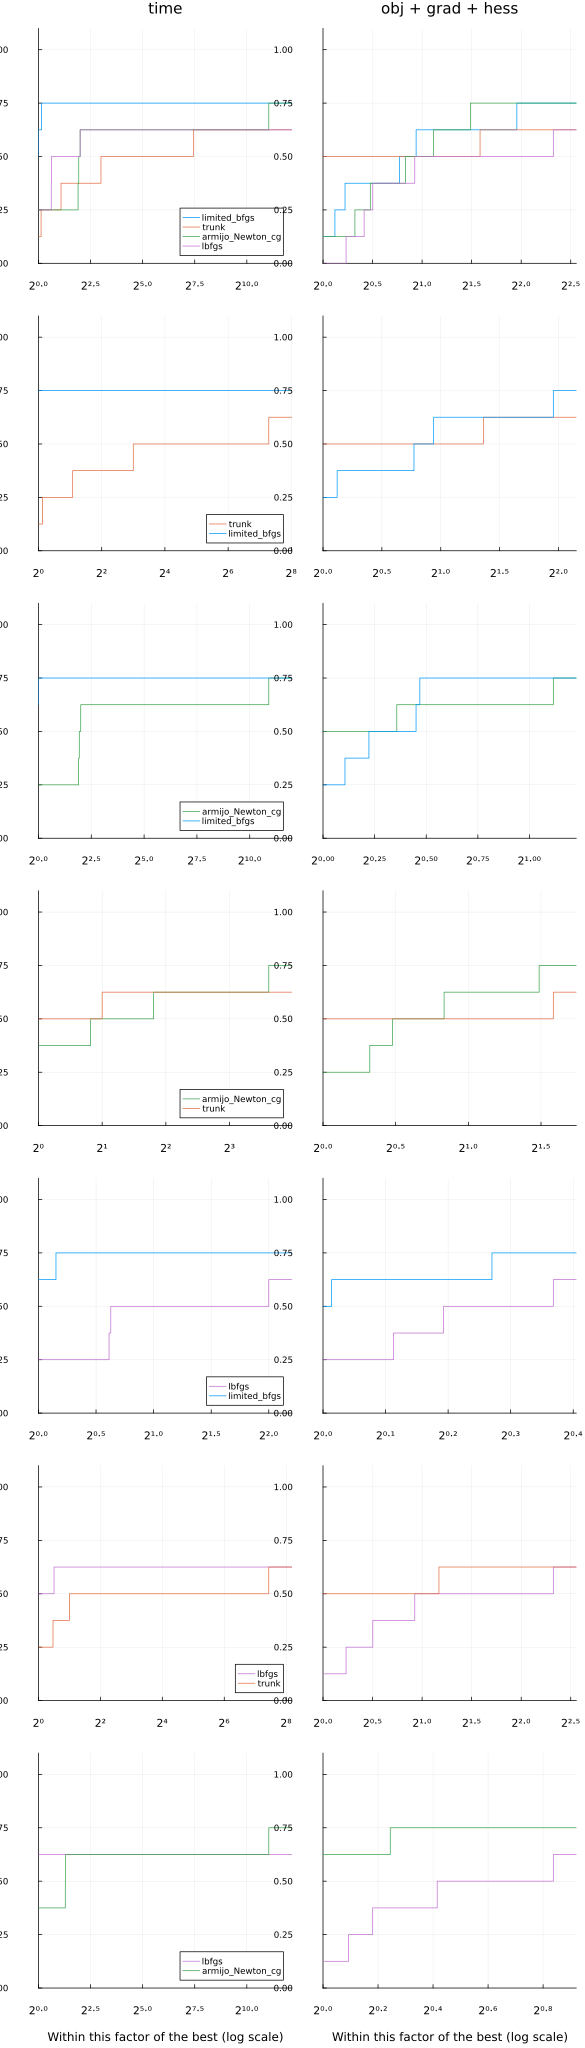

In [98]:
first_order(df) = df.status .== :first_order
unbounded(df) = df.status .== :unbounded
solved(df) = first_order(df) .| unbounded(df)
costnames = ["time", "obj + grad + hess"]
costs = [
  df -> .!solved(df) .* Inf .+ df.elapsed_time,
  df -> .!solved(df) .* Inf .+ df.neval_obj .+ df.neval_grad .+ df.neval_hprod,
]

using Plots
gr()

profile_solvers(stats, costs, costnames)

Vous vous en doutez pour le rapport de cette semaine on va vouloir réaliser une benchmark avec les deux méthodes que l'on a codé.

In [99]:
OptimizationProblems.meta

,nvar,variable_nvar,ncon,variable_ncon,minimize,name,has_equalities_only
,Int64,Bool,Int64,Bool,Bool,String,Bool
1,1,0,0,0,1,AMPGO02,0
2,1,0,0,0,1,AMPGO03,0
3,1,0,0,0,1,AMPGO04,0
4,1,0,0,0,1,AMPGO05,0
5,1,0,0,0,1,AMPGO06,0
6,1,0,0,0,1,AMPGO07,0
7,1,0,0,0,1,AMPGO08,0
8,1,0,0,0,1,AMPGO09,0
9,1,0,0,0,1,AMPGO10,0


### Appendix:

Une petite remarque sur la gestion de la mémoire:

In [65]:
#Pour les nombres:
a = 1
@show a
b = a
@show b
a = 2
@show b

a = 1
b = 1
b = 1


1

In [66]:
#Pour les tableaux:
a = zeros(Float64, 2) #or zeros(2)
@show a
b = a
@show (a,b)
a = ones(Float64, 2)
@show (a,b)

#Pour les tableaux:
a = ones(Float64, 2)
b = a
@show (a,b)
a .= 2*ones(Float64, 2) #same would go with grad!
@show (a,b)

a = [0.0, 0.0]
(a, b) = ([0.0, 0.0], [0.0, 0.0])
(a, b) = ([1.0, 1.0], [0.0, 0.0])
(a, b) = ([1.0, 1.0], [1.0, 1.0])
(a, b) = ([2.0, 2.0], [2.0, 2.0])


([2.0, 2.0], [2.0, 2.0])

In [67]:
#Pour les NLPModels, il existe aussi des fonctions qui interviennent sur la mémoire
gk = grad(nlp, x0)
grad!(nlp, x0, gk) #équivaut à gk .= grad(nlp, x0)

2-element Vector{Float64}:
 -2.0
 -2.0